In [ ]:
!pip install pyLDAvis

In [ ]:
!pip install pymorphy2
import pymorphy2
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
analyzer = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.7/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.g

In [ ]:
f = open('/content/drive/MyDrive/4/комп_линг/Lab2/edited_corpus.json', 'r')
corpus = f.read()
f.close()

Проведём предобработку копуса

In [ ]:
corp = corpus
corp = corp.split('", "')
sent = '", "'.join([corp[1408],corp[1409],corp[1410]])
corp.append(sent)
for i in range(1,4):
  i +=i
  corp.remove(corp[1408])
corp.remove(corp[149])
corp1 = corp.copy()

stops = stopwords.words("russian") + ["это", "который", "наш", "мочь", "год", 
                                            "такой", "знать", "мы", "свой", "один", "другой", "хотеть",
                                            "человек", "всё", "весь", "очень", "думать", "нужно",
                                            "большой", "время", "использовать", "говорить", "сказать",
                                            "иметь", "сделать", "первый", "каждый", "день", "её", "ваш",
                                            "стать", "больший", "ваше", "день", "самый", "понять",
                                            "просто", "ещё", "проблема", "также", "например"]


punct = string.punctuation + "—" + "«" + "»"+'``'+"''"+'–'+'“'
set_pos = {'PREP','CONJ','PRCL'}
corp2 = []
for i in range(len(corp1)):
  corp1[i] = word_tokenize(corp1[i])
  l = [analyzer.parse(j.lower())[0].normal_form for j in corp1[i] if ((j not in punct) and (analyzer.parse(j.lower())[0].normal_form not in stops)  and
              (str(analyzer.parse(j.lower())[0].tag.POS) not in set_pos))]
  corp2.append(l)

Создадим словарь и корпус, а также построим модель

In [ ]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(corp1)
corpus = [id2word.doc2bow(text) for text in corp2]

In [ ]:
from gensim.models import LdaMulticore

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
def coherence(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_val = []
    models = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        models.append(model)
        coherence = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_val.append(coherence.get_coherence())
    return models, coherence_val

In [ ]:
models, coherence_val = coherence(dictionary=id2word, corpus=corpus, texts=corp2, start=2, limit=30, step=2)

In [ ]:
import matplotlib.pyplot as plt

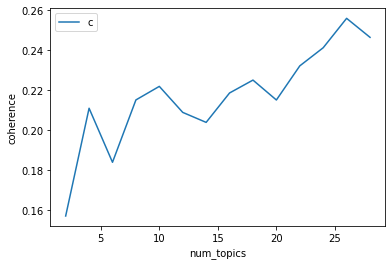

In [ ]:
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_val)
plt.xlabel("num_topics")
plt.ylabel("coherence")
plt.legend(("coherence_val"), loc='best')
plt.show()

Таким образом, наиболее оптимально количество тем - 26 (т.к. stop = 2 и step =2). Это 12ая модель в списке models

Для наглядности воспользуемся библиотекой pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os

In [ ]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(models[12], corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14     0.075437 -0.085542       1        1  7.156696
8      0.063453  0.007535       2        1  5.936343
17     0.040908  0.031515       3        1  5.735487
7      0.049572  0.019828       4        1  5.728648
5      0.053870  0.032817       5        1  5.630056
13     0.041288  0.005782       6        1  5.591442
10     0.037118  0.059397       7        1  5.240744
2      0.031644  0.030832       8        1  4.958957
21     0.032249 -0.005186       9        1  4.930728
11     0.033966 -0.022507      10        1  4.508481
15     0.017618  0.018309      11        1  4.075203
20     0.004905 -0.050832      12        1  3.837558
22     0.000348 -0.011376      13        1  3.675745
16     0.003391 -0.024427      14        1  3.649963
18    -0.000513  0.052657      15        1  3.450979
23     0.001720  0.006912      16        1  3.416209
19    -0.012946 -0.064223      17        1  3.186874
25    -0.018665 -0.020684      18        1  2.760570
24    -0.036965 -0.004155      19        1  2.703081
4     -0.052250  0.007958      20        1  2.492717
3     -0.050041  0.029427      21        1  2.363329
0     -0.056929 -0.019221      22        1  2.074999
12    -0.074497  0.013777      23        1  1.821254
9     -0.040763 -0.020430      24        1  1.811627
6     -0.066497  0.000862      25        1  1.788340
1     -0.077420  0.010976      26        1  1.473969, topic_info=                 Term        Freq       Total Category  logprob  loglift
406         президент  332.000000  332.000000  Default  30.0000  30.0000
226            партия   76.000000   76.000000  Default  29.0000  29.0000
163         подписать   38.000000   38.000000  Default  28.0000  28.0000
2283          депутат   79.000000   79.000000  Default  27.0000  27.0000
320      законопроект   40.000000   40.000000  Default  26.0000  26.0000
...               ...         ...         ...      ...      ...      ...
2389           пройти    0.735114   32.932564  Topic26  -6.2756   0.4150
6355   переименование    0.709589   17.909015  Topic26  -6.3109   0.9888
14494      обнаружить    0.702994   20.105386  Topic26  -6.3203   0.8638
6242         провести    0.697707   48.699812  Topic26  -6.3278  -0.0284
4269          местный    0.690131   16.570078  Topic26  -6.3388   1.0387

[2041 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
19023      5  0.517711         0,7
3760       1  0.082880           1
3760       2  0.041440           1
3760       3  0.082880           1
3760       4  0.041440           1
...      ...       ...         ...
9060      25  0.185026           ’
6516      13  0.900141           №
4423       7  0.819071  №1922/2020
2417      11  0.873441          №2
13610     11  0.873441       №9586

[5794 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 9, 18, 8, 6, 14, 11, 3, 22, 12, 16, 21, 23, 17, 19, 24, 20, 26, 25, 5, 4, 1, 13, 10, 7, 2])